In [1]:
from collections import defaultdict
import math
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt


def read_city_coordinates(file_path):
    city_coordinates = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 3:
                city = parts[0]
                latitude = float(parts[1])
                longitude = float(parts[2])
                city_coordinates[city] = (latitude, longitude)
    return city_coordinates

file_path = '16_Romanian_Cities.tsxt' 
city_coordinates = read_city_coordinates(file_path)
city_distances = defaultdict(float)

def calculate_distance(city1, city2):
    # Calculate the Euclidean distance between two cities
    lat1, lon1 = city_coordinates[city1]
    lat2, lon2 = city_coordinates[city2]
    return math.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)
for city1 in city_coordinates:
    for city2 in city_coordinates:
        if city1 != city2:
            city_distances[(city1,city2)] = calculate_distance(city1, city2)
            city_distances[(city2,city1)] = calculate_distance(city1, city2)


FileNotFoundError: [Errno 2] No such file or directory: '16_Romanian_Cities.tsxt'

In [ ]:
import random
def generate_initial_population(population_size):
    # Generate an initial population of random tours
    initial_population = []
    cities_list = list(city_coordinates.keys())  # Get the list of city names
    for _ in range(population_size):
        tour = random.sample(cities_list, len(cities_list))  # Create a random permutation of city names
        initial_population.append(tour)
    return initial_population
CONSTANT = 5 # initialized with 5 for simplicity
routes = generate_initial_population(CONSTANT)

In [ ]:
def fitness_of_route(route):
    total = 0
    for i in range(1, len(route)):
        start = route[i-1]
        end = route[i]

        total += city_distances[start,end]
    return total




In [ ]:

def crossover(parent1, parent2):
    offspring = [-1] * len(parent1)
    start_index = random.randint(0, len(parent1) - 1)
    end_index = random.randint(start_index, len(parent1) - 1)
    
    offspring[start_index:end_index + 1] = parent1[start_index:end_index + 1]
    
    remaining_genes = [gene for gene in parent2 if gene not in offspring]
    offspring = [gene if gene != -1 else remaining_genes.pop(0) for gene in offspring]
    
    return offspring


In [ ]:
def mutate(tour):
    for i in range(len(tour)):
        j = random.randint(0, len(tour) - 1)
        tour[i], tour[j] = tour[j], tour[i]
    return tour


In [ ]:
import matplotlib.pyplot as plt

def plot_tsp_path(cities, path, total_distance, start_color='green', end_color='red'):

    # Extract city coordinates
    x = [cities[city][1] for city in cities]  # longitude
    y = [cities[city][0] for city in cities]  # latitude
    
    # Plot cities
    plt.scatter(x, y, color='blue', label='Cities')
    
    # Plot path
    path_x = [cities[city][1] for city in path]
    path_y = [cities[city][0] for city in path]
    plt.plot(path_x, path_y, color='red', linewidth=1, linestyle='-', marker='o', label='Path')
    
    # Annotate cities
    for city, xi, yi in zip(cities.keys(), x, y):
        plt.annotate(city, (xi, yi), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Annotate total distance at the bottom
    plt.text(0.5, -0.05, f'Total Distance: {total_distance:.2f}', horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)
    
    # Color the starting and ending cities
    start_city = path[0]
    end_city = path[-1]
    start_index = list(cities.keys()).index(start_city)
    end_index = list(cities.keys()).index(end_city)
    plt.scatter(x[start_index], y[start_index], color=start_color, label='Start City')
    plt.scatter(x[end_index], y[end_index], color=end_color, label='End City')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Traveling Salesman Problem')
    plt.legend()
    plt.grid(True)
    plt.show()




defaultdict(<class 'float'>, {('Oradea', 'Zerind'): 0.5839428577568943, ('Zerind', 'Oradea'): 0.5839428577568943, ('Oradea', 'Arad'): 1.0662290239627221, ('Arad', 'Oradea'): 1.0662290239627221, ('Oradea', 'Timisoara'): 1.4596035309702087, ('Timisoara', 'Oradea'): 1.4596035309702087, ('Oradea', 'Lugoj'): 1.3579833964716577, ('Lugoj', 'Oradea'): 1.3579833964716577, ('Oradea', 'Mehadia'): 2.188230906644701, ('Mehadia', 'Oradea'): 2.188230906644701, ('Oradea', 'Drobeta'): 2.5208795784254105, ('Drobeta', 'Oradea'): 2.5208795784254105, ('Oradea', 'Craiova'): 3.3109864431728906, ('Craiova', 'Oradea'): 3.3109864431728906, ('Oradea', 'Sibiu'): 2.5609867670972486, ('Sibiu', 'Oradea'): 2.5609867670972486, ('Oradea', 'Fagaras'): 3.2832194713918503, ('Fagaras', 'Oradea'): 3.2832194713918503, ('Oradea', 'Pitesti'): 3.670691555575071, ('Pitesti', 'Oradea'): 3.670691555575071, ('Oradea', 'Giurgiu'): 5.127144239046695, ('Giurgiu', 'Oradea'): 5.127144239046695, ('Oradea', 'Bucharest'): 4.924018349010801

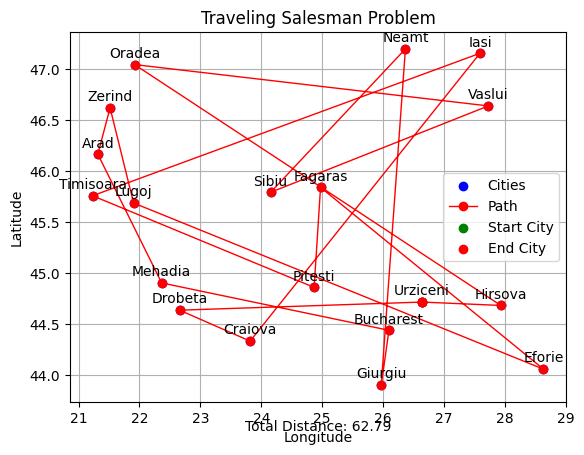

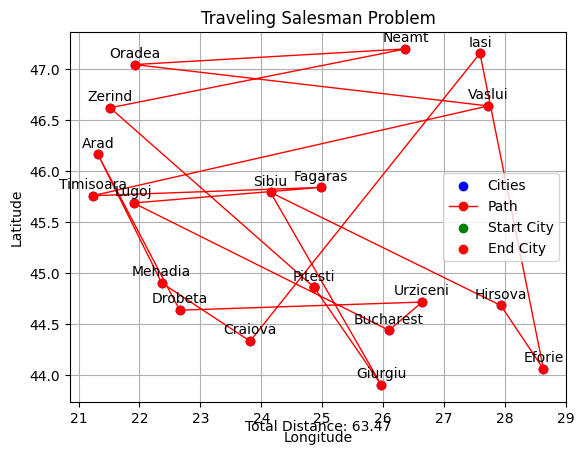

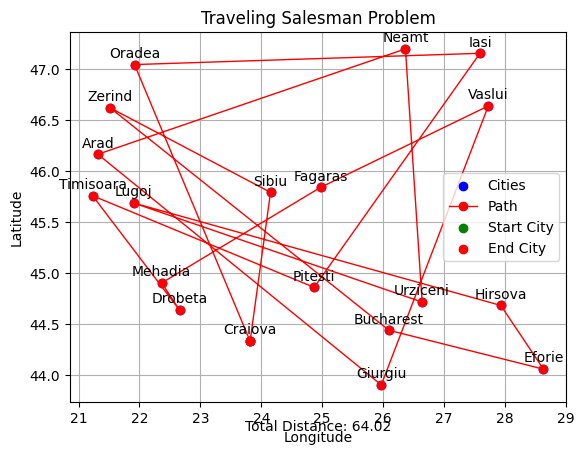

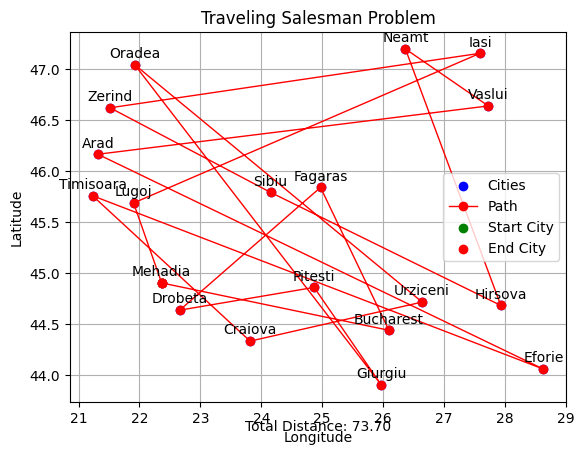

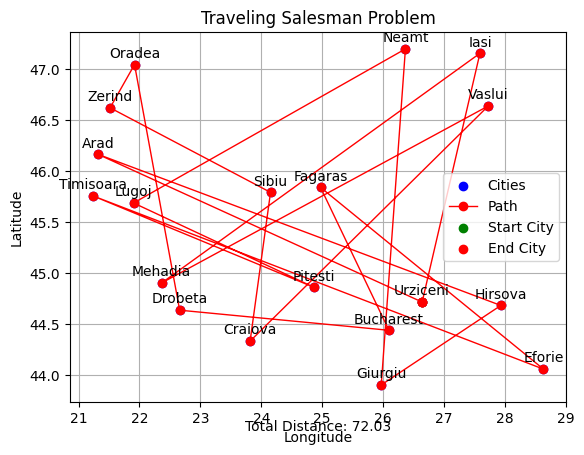

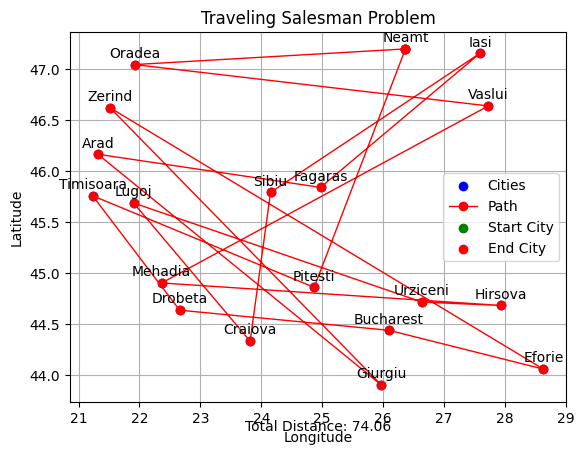

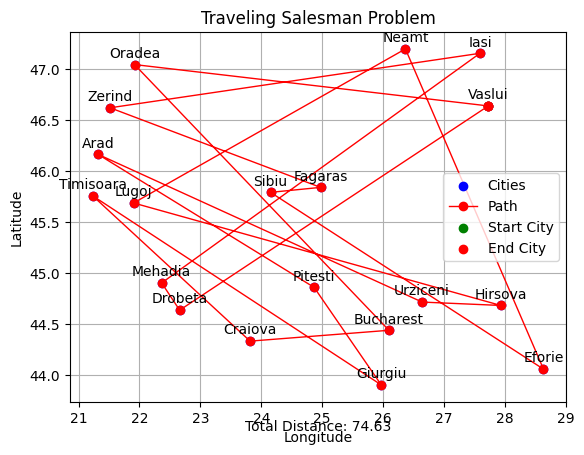

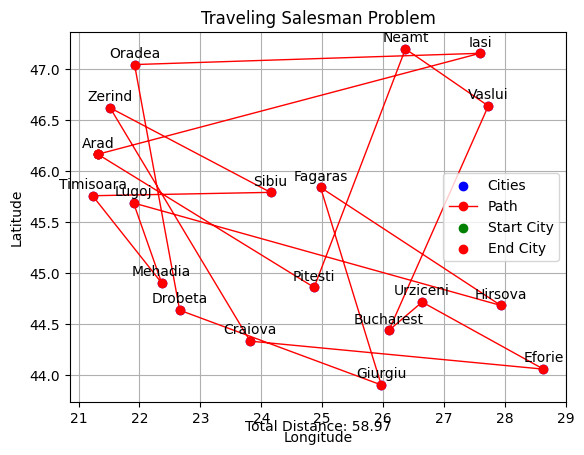

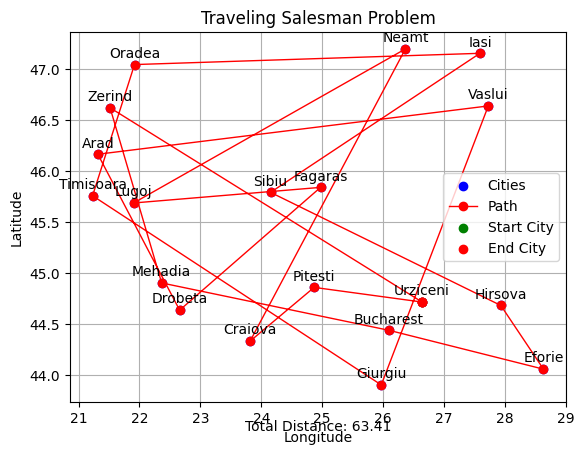

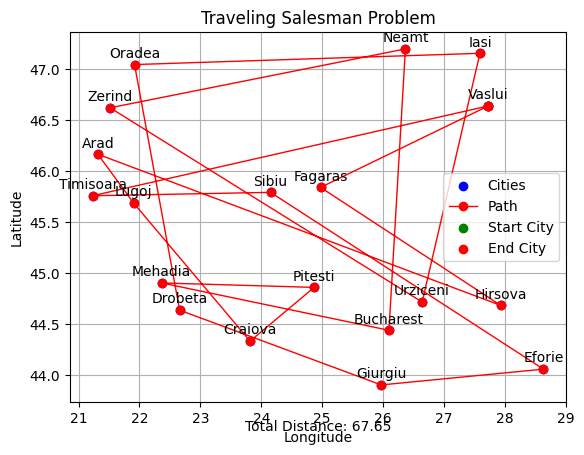

In [ ]:
children = routes
print(city_distances)
while len(children) >= 2:
    temp =[]
    children.sort(key = lambda x: -fitness_of_route(x))
    for i in range(1,len(children)):
        parent1 = routes[i-1]
        parent2 = routes[i]
        child = crossover(parent1, parent2) # produce off spring
        child = mutate(child) # mutate the child
        child.append(child[0])
        # display child
        plot_tsp_path(city_coordinates,child,fitness_of_route(child))
        temp.append(child)
    children = temp


